# 분류
- 학습 데이터로 주어진 데이터의 피처와 레이블값을 ML 알고리즘으로 학습해 모델을 생성하고 생성된 모델에 새로운 데이터 값이 주어졌을 때 레이블 값을 예측하는 것
- 이번 장에서는 분류중에서도 앙상블 위주로 다룰 예정

## 결정 트리
- ML 알고리즘인 동시에 랜덤 포레스트의 기본 구성 요소이기도 함
- 데이터의 규칙을 학습을 통해 자동으로 찾아내서 트리 기반의 분류 규칙을 만드는 알고리즘

### 용어
- 규칙 노드: 규칙 조건
- 리프 노드: 결정된 클래스 값. 자식을 가지지 않는 노드
- 서브 트리: 새로운 규칙 조건마다 생성됨

### 성능
- 깊이가 깊어질수록 과적합으로 이어지기 쉬워 결정트리의 성능 저하 가능성도 높아짐
- 가능한 적은 결정노드로 높은 정확도를 가지기 위해선 분류시 최대한 균일한 데이터 세트를 구성해야 한다.

In [2]:
# graphviz를 사용해 붓꽃 결정 트리를 만들고 시각화하는 코드

import os

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

iris = load_iris()
x = iris.data[:, 2:] # 꽃잎 길이와 너비
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(x, y)

export_graphviz(
    tree_clf,
    out_file="img/iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

In [3]:
!dot -Tpng img/iris_tree.dot -o img/iris_tree.png

![iris_decision_tree](img/iris_tree.png)

- sample: 얼마나 많은 훈련 샘플이 적용되었는지
- value: 노드에서 각 클래스에 얼마나 많은 훈련 샘플이 있는지
- gini: 정보의 불순도를 측정

## 지니계수
- 엔트로피: 분자의 무질서함을 측정하는 것으로 질서정연할수록 0
- 정보의 균일도를 측정하는 대표적인 방법. 지니계수가 낮을수록 데이터 균일도가 높은 것으로 해석
- 둘 다 사용하긴 하지만 지니계수가 조금 더 계산이 빨라 디폴트로 좋지만, 다른 트리가 만들어질 경우에 지니계수가 빈도 높은 클래스를 한 쪽으로 고립시키는 경향이 있는 것에 비해서 엔트로피가 조금 더 균형잡힌 트리를 만드는 경향이 있다. 
    - [관련링크 - 결정-트리와-불순도에-대한-궁금증](https://tensorflow.blog/2018/03/25/%EA%B2%B0%EC%A0%95-%ED%8A%B8%EB%A6%AC%EC%99%80-%EB%B6%88%EC%88%9C%EB%8F%84%EC%97%90-%EB%8C%80%ED%95%9C-%EA%B6%81%EA%B8%88%EC%A6%9D/)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습. 
dt_clf.fit(X_train , y_train)

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="img/tree.dot", class_names=iris_data.target_names , \
feature_names = iris_data.feature_names, impurity=True, filled=True)

In [8]:
!dot -Tpng img/tree.dot -o img/tree.png

![tree](img/tree.png)

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<AxesSubplot:>

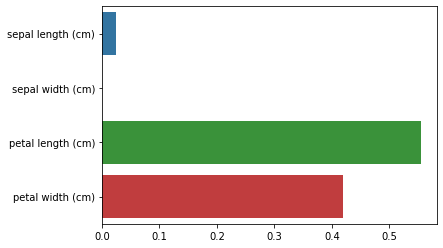

In [12]:
# 피처별로 중요도 값을 매핑하고 막대그래프로 표현
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dt_clf.feature_importances_ , y=iris_data.feature_names)

## 과적합
- 결정트리는 훈련 데이터에 대한 제약사항이 거의 없는데, 제한을 두지 않으면 트리가 훈련 데이터에 가깝게 맞추려 해서 보통 과적합하게 되기 쉬움
- 이런 경우를 방지하기 위해서 매개변수를 사용. min_samples_split, max_features 등의 파라미터가 있고, 이외에 사이킷런에선 max_depth를 사용해서 결정트리의 최대 깊이를 제어하기도 한다

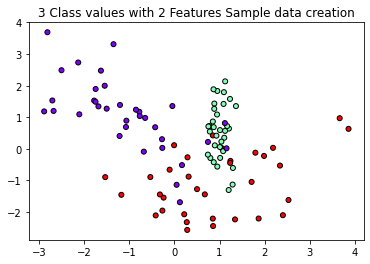

In [13]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성. 
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_classes=3, n_clusters_per_class=1,random_state=0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨. 
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')

In [14]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

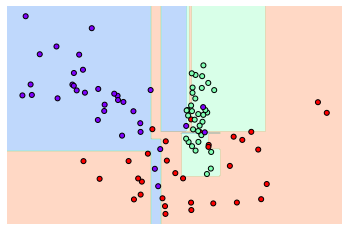

In [15]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약없는 결정 트리의 Decsion Boundary 시각화.
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

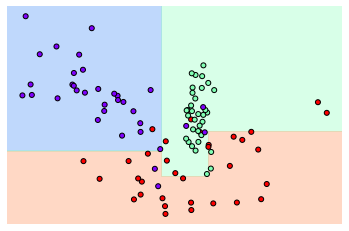

In [16]:
# min_samples_leaf=6 으로 트리 생성 조건을 제약한 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier( min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

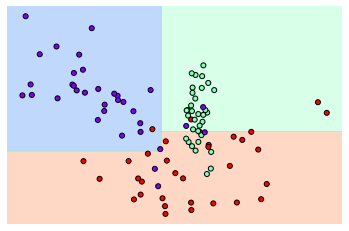

In [17]:
# max_depth = 2 인 트리의 시각화
visualize_boundary(tree_clf, X_features, y_labels)

## 결정트리의 장단점
- 장점
    - 사용하기 편하고 배우기 쉽다.
    - 성능도 뛰어난 편.
- 단점
    - 과적합되기 쉽다.
    - 훈련 데이터에 있는 작은 변화에도 매우 민감한 편이다.